# <h3>Prediciting price of laptops using different regression models</h3>
  <p>Here, I have tried to predict the price of laptops using different regression models. I have          also used the K means Algorithm to find clusters using parameters screensize and memory.You can      also expand the dataset by adding categorical values using the feature engineering technique          provided at the end of the notebook.</p>
  
     Algorithms
          Linear Regression
          TheilSenRegressor
          RANSAC Regressor
          HuberRegressor
          Gaussian Process Regressor
          Support Vector Machine
          Nu-Support Vector Classification
          KNN
          Random Forest
          Decision Tree
          Extra Tree
          AdaBoost Regressor
          Passive Aggressive Regressor
          Bagging Regressor
          Gradient Boosting
          XGBoost
          Catboost
          Stochastic Gradient Descent
          Lasso
          Kernel Ridge Regression
          Bayesian Ridge
          Elastic Net Regression
          K-Means Algorithm

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-brands-dataset/laptops_dataset.csv


<h3>Linear Regression Model</h3>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_csv('../input/laptop-brands-dataset/laptops_dataset.csv')
df.dropna()
df.head()

,Name,Price,Screensize,Memory
0,Acer Aspire 7 A715-41G-R6S8 (NH.Q8DSI.001),"54,990",15.6 Inch,8 GB
1,Acer Aspire Switch One SW110-1CT (UT.709SI.001),"13,500",10.1 Inch,2 GB
2,Acer Aspire 3 A315-53 (NX.H38SI.010),"23,990",15.6 Inch,4 GB
3,Acer Aspire 7 A715-42G (NH.QAYSI.001),"61,369",15.6 Inch,8 GB
4,Acer Aspire 7 A715-75G (NH.Q85SI.003),"57,990",15.6 Inch,8 GB


In [3]:
df['Price']=df['Price'].str.replace(',','')
df['Screensize (Inch)']=df['Screensize'].str.slice(0,-5)
df['Memory (GB)']=df['Memory'].str.slice(0,-3)
df=df.drop('Screensize',axis=1)
df=df.drop('Memory',axis=1)
df=df.drop('Name',axis=1)
df

,Price,Screensize (Inch),Memory (GB)
0,54990,15.6,8
1,13500,10.1,2
2,23990,15.6,4
3,61369,15.6,8
4,57990,15.6,8
...,...,...,...
139,52200,15.6,8
140,62290,14,8
141,41990,15.6,8
142,67349,15.6,8


In [4]:
Y = df['Price']
X = df.drop(['Price'], axis=1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred

array([ 55688.30895577,  19828.35938982,  57292.14681794,  30712.45067036,
        30712.45067036,  57292.14681794, 105640.02552659,  32316.28853253,
        30712.45067036,  32316.28853253,  55688.30895577,  55688.30895577,
        57292.14681794,  30712.45067036,  57292.14681794,  57292.14681794,
       107243.86338875,  55688.30895577,  32316.28853253,  57292.14681794,
        57292.14681794,  57292.14681794,  57292.14681794,  57292.14681794,
        55688.30895577,  32316.28853253,  32316.28853253,  55688.30895577,
        55688.30895577])

In [7]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, y_pred))

Coefficients: [1002.39866385 6243.96457135]
Intercept: -8296.988908981366
Mean squared error (MSE): 393251369.32
Coefficient of determination (R^2): 0.22


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

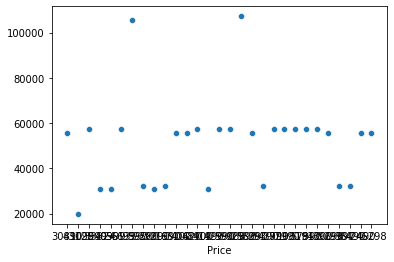

In [8]:
import seaborn as sns
sns.scatterplot(Y_test, y_pred)

<h3>TheilSenRegressor</h3>

In [9]:
from sklearn.linear_model import  TheilSenRegressor
model = TheilSenRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.2592188634819972


<h3>RANSAC Regressor</h3>

In [10]:
from sklearn.linear_model import  RANSACRegressor
model = RANSACRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.16945163570610655


<h3>Huber Regressor</h3>

In [11]:
from sklearn.linear_model import  HuberRegressor
model = HuberRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.19631440058181449


In [12]:
df.shape

(144, 3)

<h3>Gaussian Process Regressor</h3>

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.2534476381503922


<h3>Support vector Regression</h3>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

-0.11004472955623723


<h3>Nu Support vector Regression</h3>

In [15]:
from sklearn.svm import NuSVR
X= df.iloc[:,1:3].values.astype(np.float64)
y = df.iloc[:, 0].values.astype(np.float64)
model = NuSVR()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
score = model.score(X_train, Y_train)
print(accuracy)

-0.05207712389493335


<h3>KNN Regression</h3>

In [16]:
from sklearn.neighbors import KNeighborsRegressor
X= df.iloc[:,1:3].values.astype(np.float64)
y = df.iloc[:, 0].values.astype(np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
model = KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
score = model.score(X_train, y_train)
print(accuracy)


0.6487614667603532


<h3>Random Forest</h3>

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)


0.664546982872501


<h3>Decision Tree</h3>

In [18]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)

0.6268948623371123


<h3>Extra Trees</h3>

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)


0.633984153459358


<h3>Adaboost</h3>

In [20]:
from sklearn.ensemble import AdaBoostRegressor
regressor =AdaBoostRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)


0.5970721131262751


<h3>Passive Aggressive Regressor</h3>

In [21]:
from sklearn.linear_model import PassiveAggressiveRegressor
regressor =PassiveAggressiveRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)

0.636834900062393


<h3>Bagging Regressor</h3>

In [22]:
from sklearn.ensemble import BaggingRegressor
regressor =BaggingRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)

0.6477961888727249


<h3>Gradient Boosting Regressor</h3>

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
score = regressor.score(X_train, y_train)
print(accuracy)

0.6312689133793973


<h3>XGBoost</h3>

In [24]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X,y)
r2_score(model_xgb.predict(X), y)

[19:10:12] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.4260879587243205

In [25]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cb_model.fit(X, y)
r2_score(cb_model.predict(X), y)

0:	learn: 22775.0134344	total: 49.6ms	remaining: 24.8s
50:	learn: 14435.4628710	total: 53.3ms	remaining: 469ms
100:	learn: 13593.2232511	total: 56.7ms	remaining: 224ms
150:	learn: 13304.6339468	total: 60.8ms	remaining: 140ms
200:	learn: 13189.7442923	total: 65.5ms	remaining: 97.4ms
250:	learn: 13145.4192659	total: 70.3ms	remaining: 69.7ms
300:	learn: 13134.4133975	total: 77.6ms	remaining: 51.3ms
350:	learn: 13131.6685655	total: 83.8ms	remaining: 35.6ms
400:	learn: 13130.7737561	total: 89.7ms	remaining: 22.1ms
450:	learn: 13130.2638630	total: 96.1ms	remaining: 10.4ms
499:	learn: 13130.0723279	total: 103ms	remaining: 0us


0.5368361327283495

<h3>Stochastic Gradient Descent</h3>

In [26]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(max_iter = 100)
SGD.fit(X, Y)
r2_score(SGD.predict(X), Y)

0.43448421921103864

<h3>Lasso</h3>

In [27]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X, Y)
r2_score(lasso.predict(X), Y)

0.40250280991401666

<h3>Kernel Ridge Regression</h3>

<p>Useful for small datasets (less than 100 samples,so split the dataset)</p> 

In [28]:
dfs=df.iloc[:90,:]
dfs.head()

,Price,Screensize (Inch),Memory (GB)
0,54990,15.6,8
1,13500,10.1,2
2,23990,15.6,4
3,61369,15.6,8
4,57990,15.6,8


In [29]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X, y)
r2_score(KRR.predict(X), y)

0.4515734552339338

<h3>BayesianRidge</h3>

In [30]:
from sklearn.linear_model  import BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
BR = BayesianRidge()
BR.fit(X, y)
r2_score(BR.predict(X), y)

0.3924757284719931

<h3>Elastic Net Regression</h3>

In [31]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X, y)
r2_score(ENet.predict(X), y)

0.4024101973091585

<h3>K-Means Algorithm</h3>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  


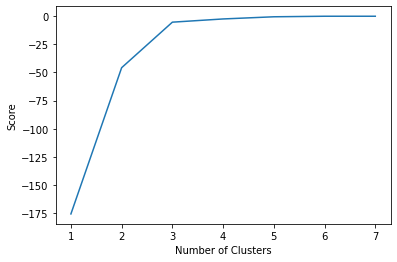

In [32]:
from sklearn.cluster import KMeans
K_clusters = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Screensize (Inch)']]
X_axis = df[['Memory (GB)']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(df[df.columns[1:3]])
df['cluster_label'] = kmeans.fit_predict(df[df.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(df[df.columns[1:3]])
df.cluster_label.unique()

array([0, 2, 1], dtype=int32)

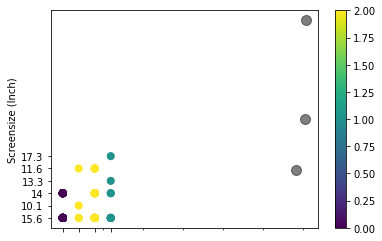

In [34]:
df.plot.scatter(x = 'Memory (GB)', y = 'Screensize (Inch)', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [35]:
df=df.drop(['cluster_label'],axis=1)
df

,Price,Screensize (Inch),Memory (GB)
0,54990,15.6,8
1,13500,10.1,2
2,23990,15.6,4
3,61369,15.6,8
4,57990,15.6,8
...,...,...,...
139,52200,15.6,8
140,62290,14,8
141,41990,15.6,8
142,67349,15.6,8


<h3>Adding a few features as categorical variables (Optional)</h3>

In [36]:
# df=pd.read_csv('../input/laptop-brands-dataset/laptops_dataset.csv')
# top_5_labels = [x for x in df.Screensize.value_counts().sort_values(ascending=False).index]
# def one_hot_encoding_top_x(df, variable, top_x_labels):
#     # function to create the dummy variables for the most frequent labels
#     # we can vary the number of most frequent labels that we encode
    
#     for label in top_x_labels:
#         df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
# # encode X2 into the 10 most frequent categories
# one_hot_encoding_top_x(df, 'Screensize', top_5_labels)
# df=df.drop(['Screensize'],axis=1)
# df.head()

In [37]:
# top_5_labels = [x for x in df['Memory (GB)'].value_counts().sort_values(ascending=False).index]
# def one_hot_encoding_top_x(df, variable, top_x_labels):
#     # function to create the dummy variables for the most frequent labels
#     # we can vary the number of most frequent labels that we encode
    
#     for label in top_x_labels:
#         df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
# # encode X2 into the 10 most frequent categories
# one_hot_encoding_top_x(df, 'Memory (GB)', top_5_labels)
# df=df.drop(['Memory (GB)'],axis=1)
# df.head()

<h3>